In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objs as go
import plotly.express as px


In [2]:

cc=pd.read_csv(r"../BankChurners.csv")

In [3]:
# erasing the last two columns provided from the previous conducted training.

cc = cc.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], errors='ignore')

In [4]:
# now we can remove ('CLENTNUM') we no longer need it.
cc = cc.drop(columns=['CLIENTNUM'], errors='ignore')

In [5]:
selected_features = ['Education_Level', 'Marital_Status','Income_Category','Card_Category']

for column in selected_features:
    unique_values = cc[column].unique()
    print(f"Unique values in the colum '{column}': {unique_values}")


Unique values in the colum 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in the colum 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in the colum 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in the colum 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


In [6]:
#We should know how many 'Unknown' values we have.

unknown_count = cc['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = cc['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = cc['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1519
Number of 'Unknown' values in Marital_Status column: 749
Number of 'Unknown' values in Income_Category column: 1112


In [7]:
# Remove customers with unknown Gender, Enducation_Level, Marital_Status, or Income_Category
cc= cc.loc[(cc['Gender'] != 'Unknown') & (cc['Education_Level'] != 'Unknown') & (cc['Marital_Status'] != 'Unknown') & (cc['Income_Category'] != 'Unknown'),]
# Remove customers with missing data
cc = cc.dropna()

In [8]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(cc.dtypes, columns=['Dtype'])
df_info['Unique'] = cc.nunique().values
df_info['Null'] = cc.isnull().sum().values
df_info

,Dtype,Unique,Null
Attrition_Flag,object,2,0
Customer_Age,int64,45,0
Gender,object,2,0
Dependent_count,int64,6,0
Education_Level,object,6,0
Marital_Status,object,3,0
Income_Category,object,5,0
Card_Category,object,4,0
Months_on_book,int64,44,0
Total_Relationship_Count,int64,6,0


In [9]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   object 
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   object 
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   object 
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open_To_

In [10]:
cc.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [11]:
#About Dataset
#A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

#Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

#We have only 15.727% of customers who have churned.

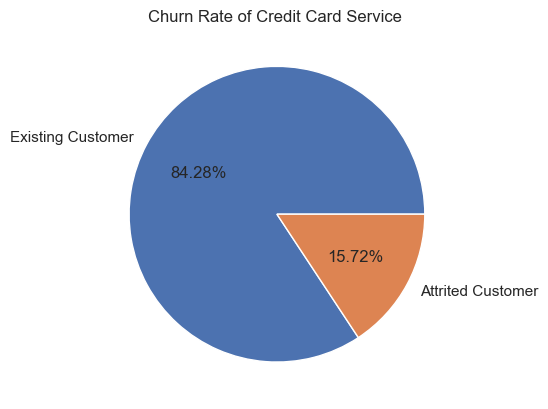

In [12]:
# presentase Churn rate Credite card service
plt.title('Churn Rate of Credit Card Service ')
plt.pie(cc['Attrition_Flag'].value_counts(), labels=cc['Attrition_Flag'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [13]:
Attrition_by_Gender = cc.groupby(['Gender','Attrition_Flag']).size()
Attrition_by_Gender = Attrition_by_Gender.reset_index(name="Count")

# Calculate percentages all 
Attrition_by_Gender['Percentage'] = Attrition_by_Gender['Count'] / Attrition_by_Gender['Count'].sum() * 100

# Calculate percentages for each gender 
total_counts = Attrition_by_Gender.groupby('Gender')['Count'].transform('sum')
Attrition_by_Gender['Percentage_Gender'] = (Attrition_by_Gender['Count'] / total_counts) * 100
Attrition_by_Gender

,Gender,Attrition_Flag,Count,Percentage,Percentage_Gender
0,F,Attrited Customer,576,8.134444,17.066667
1,F,Existing Customer,2799,39.528315,82.933333
2,M,Attrited Customer,537,7.583675,14.490016
3,M,Existing Customer,3169,44.753566,85.509984


In [14]:
# Catagorical and numerical columns
cat_col = [col for col in cc.columns if cc[col].dtype == 'object']
num_col = [col for col in cc.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")
print(f"Categorical col: {cat_col}\nNumerical col: {num_col}")

cat_col = 6
num_col = 14

Categorical col: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical col: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


C:\Users\yusra\AppData\Local\Temp\ipykernel_10760\2931228407.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yusra\AppData\Local\Temp\ipykernel_10760\2931228407.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yusra\AppData\Local\Temp\ipykernel_10760\2931228407.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yusra\AppData\Local\Temp\ipykernel_10760\2931228407.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yusra\AppData\Local\Temp\ipykernel_10760\2931228407.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\y

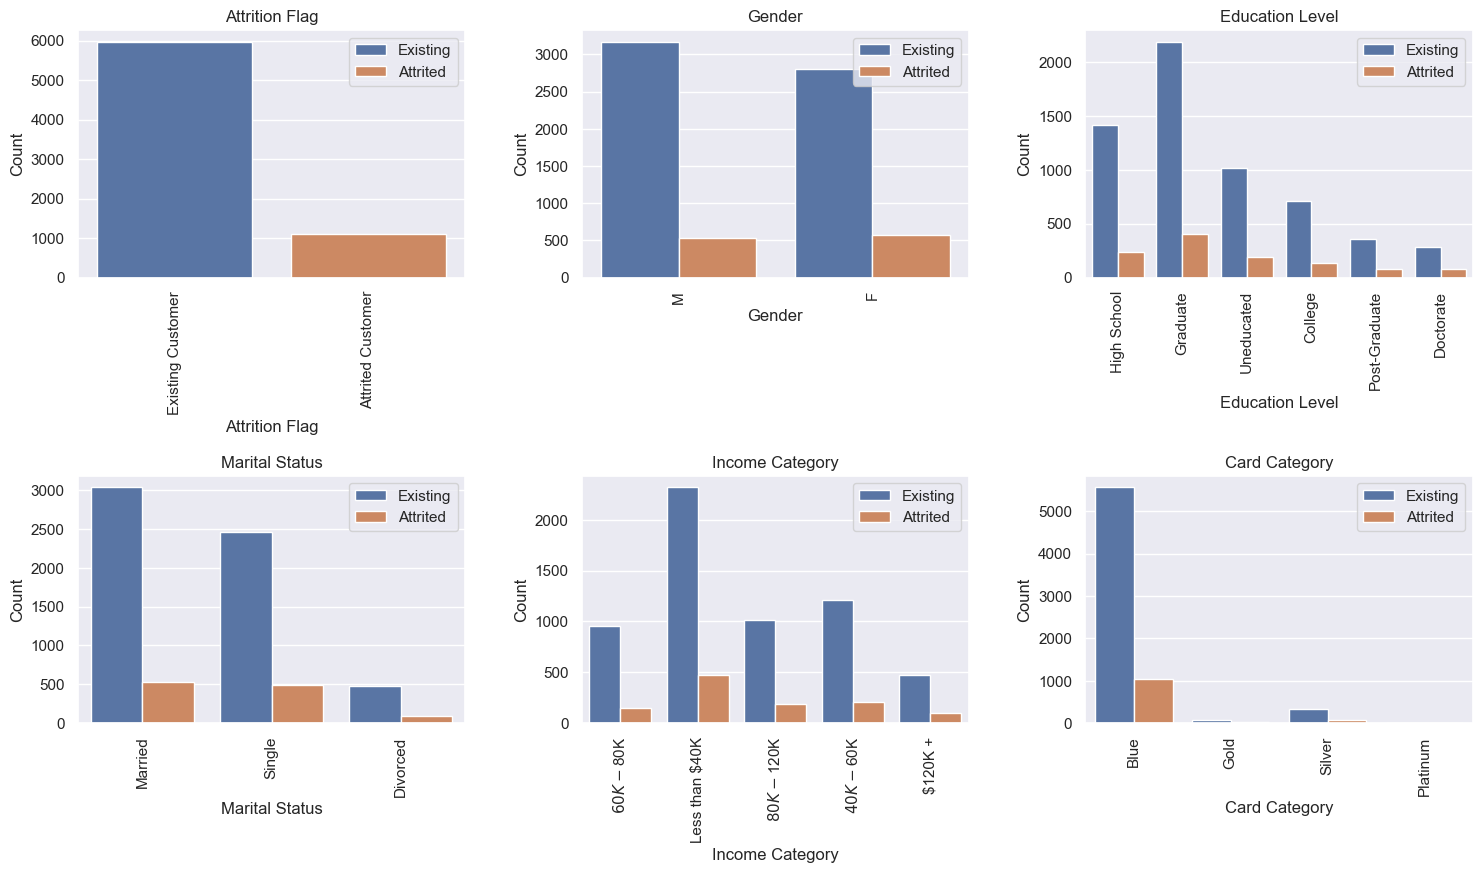

In [15]:
# Explore Categorical column
fig1, axarr1 = plt.subplots(2, 3, figsize=(18, 9))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Configure new title
title_cat = ['Attrition Flag', 'Gender', 'Education Level', 'Marital Status', 'Income Category', 'Card Category']

# Generate bar chart using loop
for i, col in enumerate(cat_col):
    sns.countplot(data=cc, x=cc[col], hue='Attrition_Flag', ax=axarr1[i // 3][i % 3])
    axarr1[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr1[i // 3][i % 3].set_ylabel('Count')
    axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
    axarr1[i // 3][i % 3].set_title(title_cat[i])
    axarr1[i // 3][i % 3].legend(['Existing','Attrited'])

plt.show()

In [16]:
#Introduction

#Clustering is an unsupervised learning technique that involves grouping a set of objects (data points) into clusters,
#  where objects in the same cluster are more similar to each other than to those in other clusters. 
# It’s widely used in exploratory data analysis, customer segmentation, anomaly detection, image compression, and more.

#There are several clustering models (algorithms), each with different approaches for grouping the data.

#For this analysis, we will be clustering credit card users based on their card activity, 
# and then we will dig a little deeper to see what other attributes may be unique to each group.

#With this information we can better understand our customer base and better serve the subgroups within, 
# allowing us to potentially improve both the customer experience as well as business metrics like turnover and card usage.

In [17]:
#Create Model and Cluster Data
#I have decided to use KMeans to cluster the customers based on their account activity, and then examine the demographic data of each group to see if they differ in a meaningful way.

#KMeans is a clustering algorithm that groups data points together based on how similar they are to each other. When we specify the number of clusters, K, that number of data points are randomly chosen as cluster centroids, and all the other data points are assigned to the cluster of the closest centroid. The centroid is then reassigned so that it becomes the average of the cluster.

#This process is repeated until the size of the clusters becomes stable.



In [18]:
# Standardize variables by removing the mean and scaling to unit variance
# Select only numeric columns
cc_numeric = cc.select_dtypes(include=['float64', 'int64'])

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(cc_numeric), columns=cc_numeric.columns)
print(scaled_data.head())


NameError: name 'StandardScaler' is not defined

In [138]:
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space with 3 features.
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns=(['feature_1','feature_2','feature_3']))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,7081.0,-3.211039e-17,1.606280,-3.096394,-1.180794,-0.295358,0.784410,5.624897
feature_2,7081.0,0.000000e+00,1.433174,-4.498991,-1.003693,-0.019245,0.952443,5.230810
feature_3,7081.0,0.000000e+00,1.343244,-4.362717,-0.932623,-0.013525,0.882063,4.231373


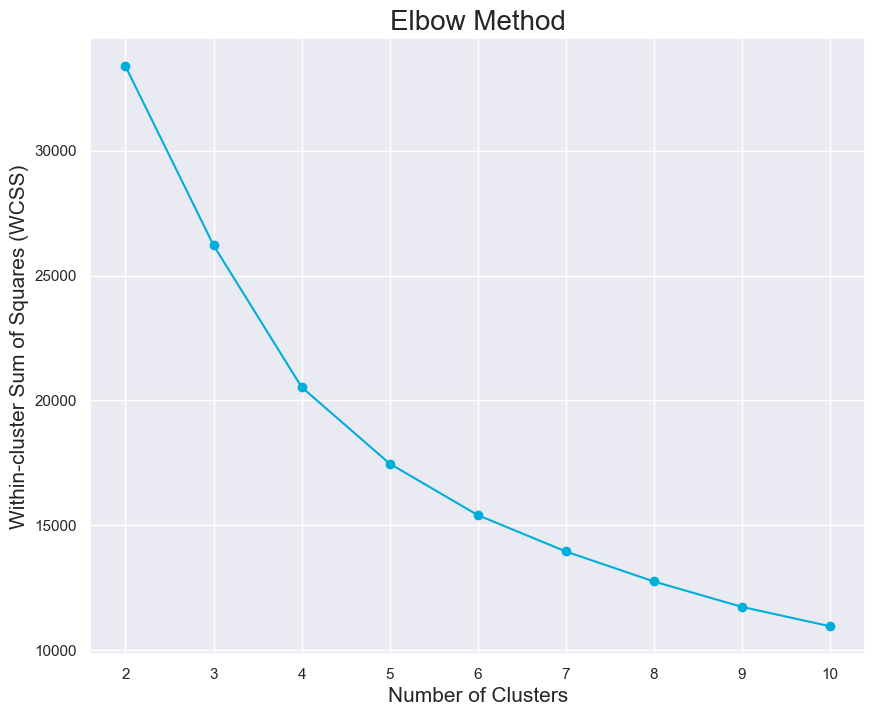

In [141]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Apply the elbow method to find the optimal number of clusters
wcss = []
for i in range(2, 11):  # Test for clusters from 2 to 10
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=1)
    km.fit(pca_data)
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=15)
plt.show()


In [142]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# cc_numeric is the cleaned numeric data with no missing values
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cc_numeric)

# Apply PCA (reduce to 2 components for clustering)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert PCA data to DataFrame
pca_data_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Fit the K-Means Clustering model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pca_data)

# Add the cluster labels to the PCA DataFrame
pca_data_df["Clusters"] = kmeans.labels_

# Add the cluster labels to the original cleaned DataFrame (cc_cleaned)
cc_numeric["Clusters"] = kmeans.labels_

# Check the first few rows of both DataFrames
print(pca_data_df.head())   # PCA Data with clusters
print(cc_numeric.head())    # Original data with clusters


        PC1       PC2  Clusters
0  0.280321 -0.355447         3
1 -0.487571  1.501377         4
2 -0.648465  1.273209         4
3 -0.549558  1.960479         4
4 -1.236212 -0.192796         4
   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5        

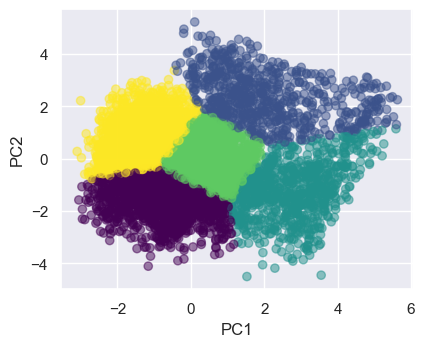

In [143]:
#Convert pca_data to a DataFrame
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca_data is a numpy array (output from PCA)
pca_data_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Assuming 'Clusters' is already assigned as a column to pca_data_df
pca_data_df["Clusters"] = kmeans.labels_

# Visualizing the clusters using the DataFrame
fig = plt.figure(figsize=(10, 8))

# Create subplots for different views of the clusters
ax1 = plt.subplot(221)
ax1.scatter(pca_data_df["PC1"], pca_data_df["PC2"], c=pca_data_df["Clusters"], cmap='viridis', marker='o', alpha=0.5)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

# If you want to visualize clusters in a 3D space, ensure you have 3 PCA components
# For example:
if pca_data.shape[1] == 3:  # Check if PCA returned 3 components
    ax2 = plt.subplot(222, projection='3d')
    ax2.scatter(pca_data_df["PC1"], pca_data_df["PC2"], pca_data_df["PC3"],
                c=pca_data_df["Clusters"], cmap='viridis', marker='o', alpha=0.5)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_zlabel('PC3')

plt.show()


In [144]:
#When using KMeans, we have to specify the number of clusters the algorithm will use. One way to find the ideal number of clusters is the elbow method.

#The elbow method allows us to identify at which K value the sum of squared distance, or the distance between data points and their respective centroids, begins to level off.

#The sum of squared distance flattening indicates that increasing the amount of clusters is not leading to better-defined clusters, so it is a good method to use when trying to find an optimal value for K.


In [145]:
#The Elbow Method is a technique used to determine the optimal number of clusters 𝐾
#K for K-Means clustering. The idea is to identify a point in the graph of the inertia 
# (sum of squared distances from each point to its assigned cluster center) vs. the number of clusters 𝐾
#K where the rate of decrease in inertia slows down. This point is often referred to as the "elbow", 
# and it represents the optimal number of clusters.

In [147]:
#Principal Component Analysis, or PCA, is a method that compresses the information found in the explanatory variables into a reduced number of new variables. 
# This reduces the noise and dimensionality of the data while preserving most of the original information.

In [164]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cols = cc.iloc[:, 9:].select_dtypes(['uint8', 'int64', 'float64']).columns
wcss = []


preprocessor = Pipeline(
[
 ("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=1))
]
)

clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=6,
                   init="k-means++",
                   n_init=50,
                   max_iter=1000,
                   random_state=1
                      )
       )
      ]
   )

pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )



pipe.fit(cc[cols])


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=6, n_init=50,
                                         random_state=1))]))])

In [149]:
print('PCA Component 1 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[0], 2))
print()
print('PCA Component 2 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[1], 2))

PCA Component 1 Ratio of Explained Variance
0.23

PCA Component 2 Ratio of Explained Variance
0.18


In [150]:
preprocessed_data = pipe["preprocessor"].transform(cc[cols])

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', round(silhouette_score(preprocessed_data, predicted_labels), 3))

Silhouette Score:  0.394


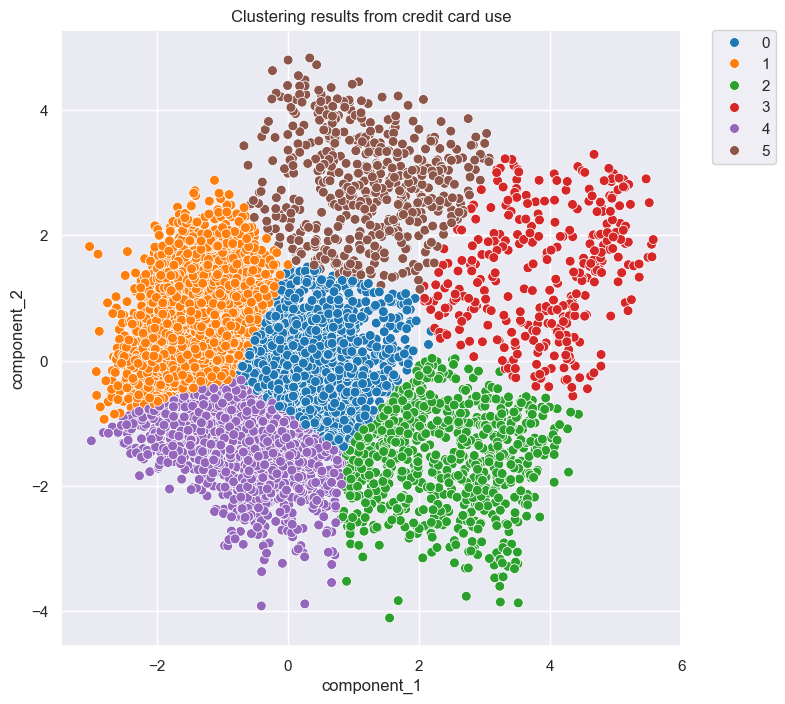

In [151]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(cc[cols]),
        columns=["component_1", "component_2"]
    )
   
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.figure(figsize=(8, 8))
   
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title("Clustering results from credit card use")
ax.title.set_size(20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

In [152]:
cc['cluster'] = pipe['clusterer']['kmeans'].labels_
cc.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,4


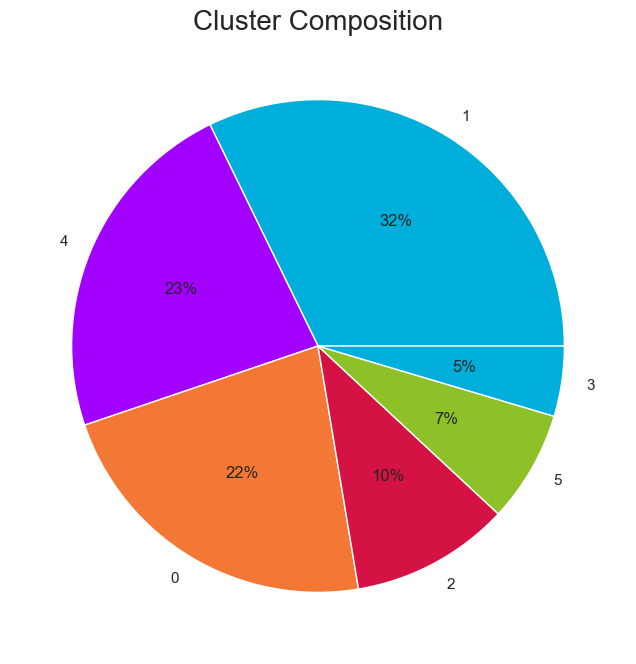

In [153]:
fig, axs = plt.subplots(figsize=(12,8))
ax = cc['cluster'].value_counts().plot.pie(autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Cluster Composition')
ax.title.set_size(20)
plt.show()

In [ ]:
#Most users fall into either Group 1, 2, or 4, with most of the rest being in Groups 0 and 3.

In [ ]:
#Examine Differences Between Clusters¶
#Now let's examine in detail how each cluster differs from the others.

#First, could there be significant differences in turnover between groups?

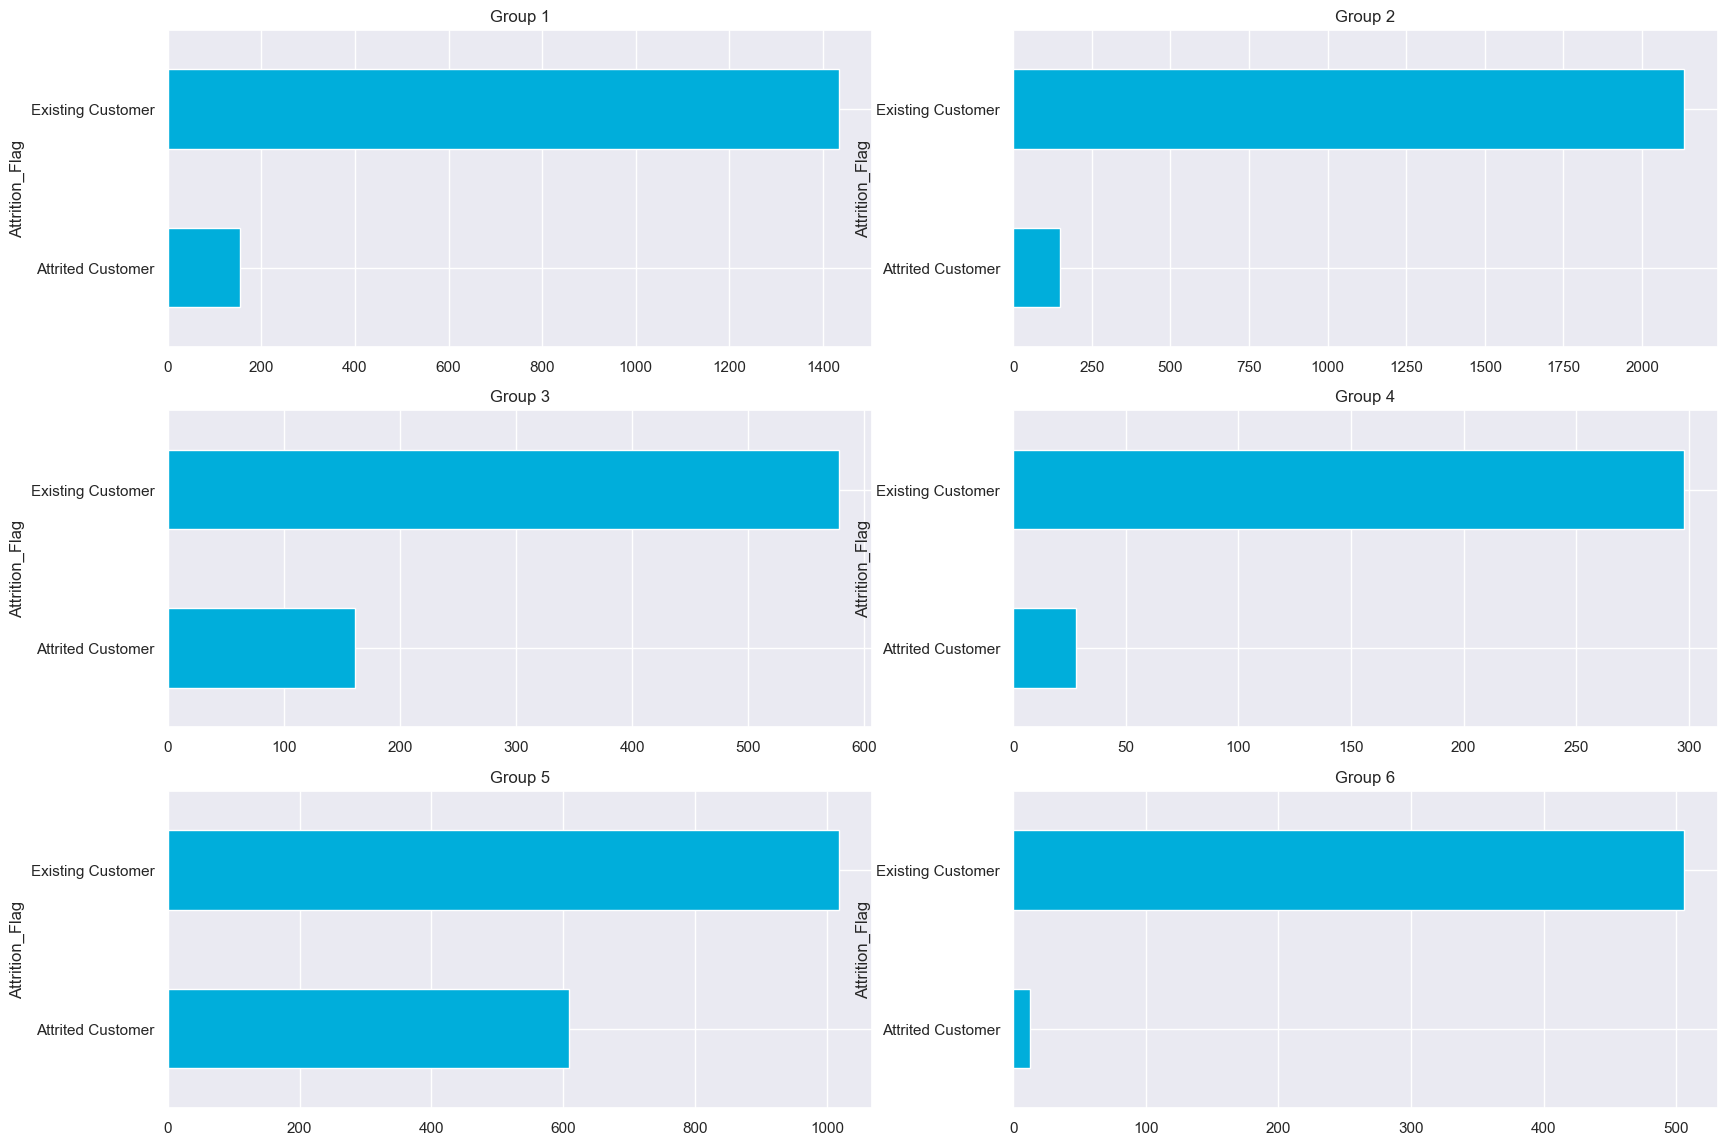

In [159]:
#Turnover¶
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,14))

cc[cc['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,0], title='Group 1')
cc[cc['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,1], title='Group 2')
cc[cc['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,0], title='Group 3')
cc[cc['cluster'] == 3]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,1], title='Group 4')
cc[cc['cluster'] == 4]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,0], title='Group 5')
cc[cc['cluster'] == 5]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,1], title='Group 6')
plt.show()

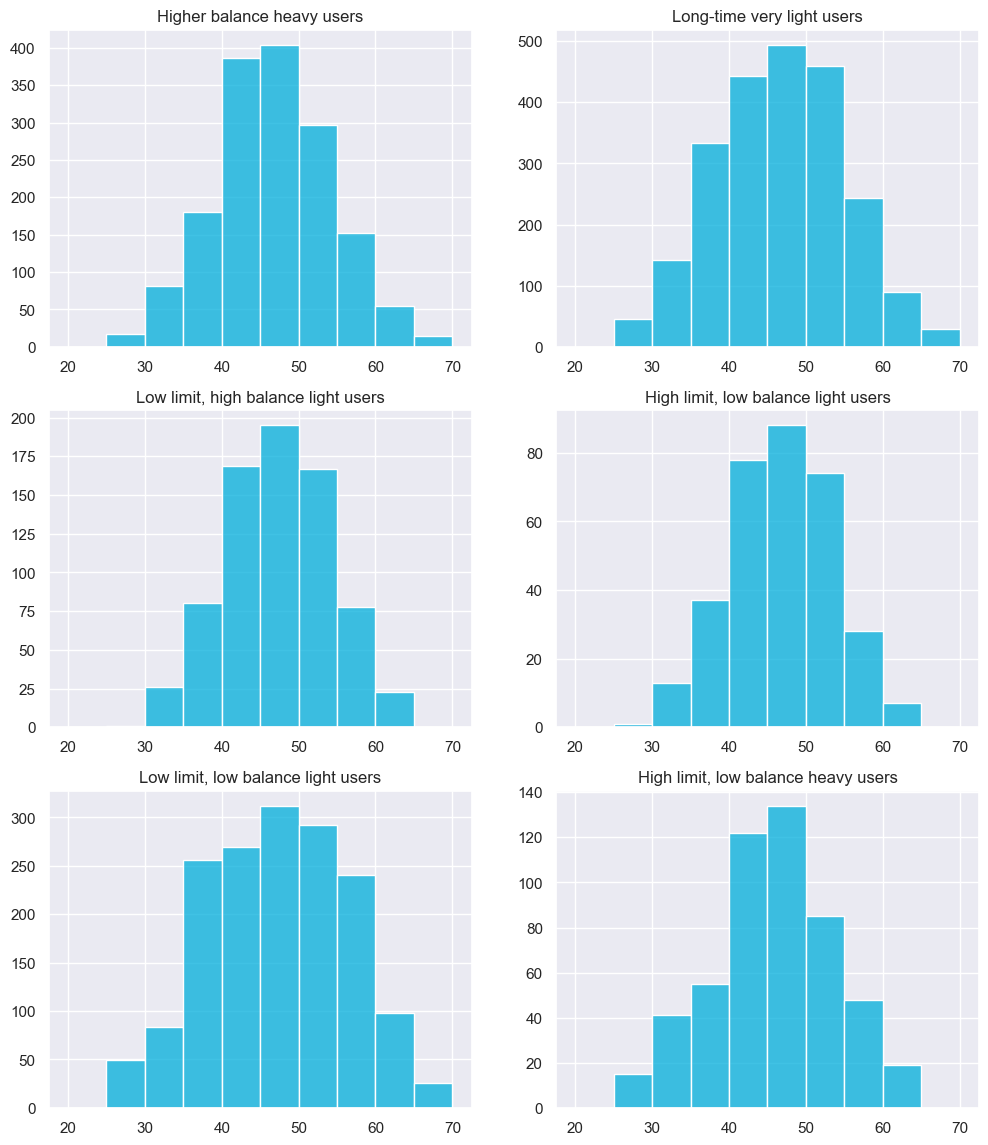

In [ ]:
#Age
#It looks like the majority of users are in their 40's and 50's for all groups. 
# Long-time light users have a higher number of users in their 60's compared to other groups. 
# Long-time light users and Low-limit high balance light users seem to have a higher number of users in their 30's.

fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

sns.histplot(cc[cc['cluster'] == 0]['Customer_Age'], ax=axs[0,0], binrange=(20,70), binwidth=5).set(title='Higher balance heavy users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 1]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Long-time very light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 2]['Customer_Age'], ax=axs[1,0], binrange=(20,70), binwidth=5).set(title='Low limit, high balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 3]['Customer_Age'], ax=axs[1,1], binrange=(20,70), binwidth=5).set(title='High limit, low balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 4]['Customer_Age'], ax=axs[2,0], binrange=(20,70), binwidth=5).set(title='Low limit, low balance light users', ylabel='', xlabel='')
sns.histplot(cc[cc['cluster'] == 5]['Customer_Age'], ax=axs[2,1], binrange=(20,70), binwidth=5).set(title='High limit, low balance heavy users', ylabel='', xlabel='')
plt.show()

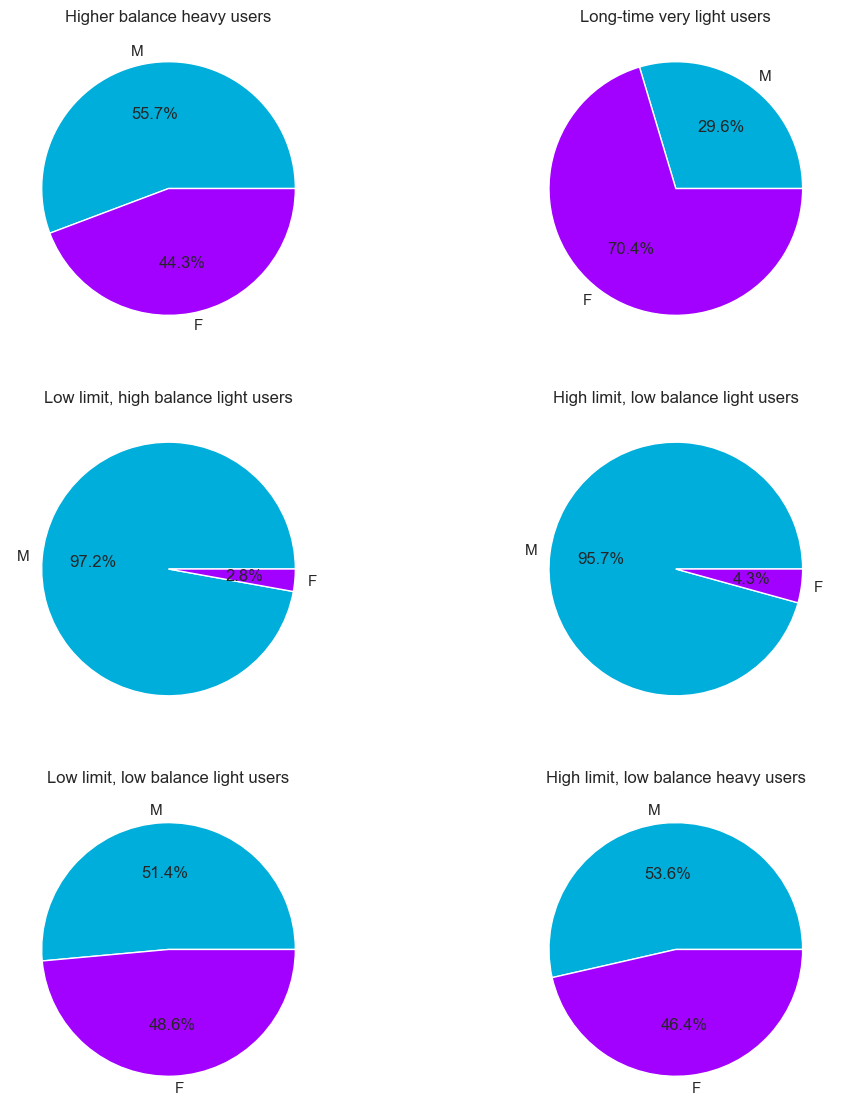

In [155]:
#Gender
#The higher limit groups mostly consist of men, while the Low limit, high balance light users group mostly consists of women.
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Higher balance heavy users', autopct='%.1f%%')
cc[cc['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,1], ylabel='', title='Long-time very light users', autopct='%.1f%%')
cc[cc['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Low limit, high balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 3]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,1], ylabel='', title='High limit, low balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 4]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,0], ylabel='', title='Low limit, low balance light users', autopct='%.1f%%')
cc[cc['cluster'] == 5]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', autopct='%.1f%%')
plt.show()

In [110]:
#Account Activity

In [156]:
scaler = StandardScaler()
scaled_cc = pd.DataFrame(scaler.fit_transform(cc[cols]), columns=cols)
scaled_cc['cluster'] = pipe['clusterer']['kmeans'].labels_
scaled_cc.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,0.764487,-1.349309,0.493777,0.460058,-0.480760,0.502567,2.574433,-0.937167,-0.945214,3.827331,-0.794057,0
1,1.412015,-1.349309,-0.411332,-0.025947,-0.373652,0.007308,3.497689,-0.894783,-1.323244,12.579779,-0.636187,1
2,0.116959,-1.349309,-2.221550,-0.556114,-1.437353,-0.427933,8.217051,-0.722936,-1.869287,6.793694,-1.012921,1
3,0.764487,-1.349309,-2.221550,-0.413874,-1.437353,-0.285773,6.339166,-1.031741,-1.533260,7.493388,-1.012921,1
4,-0.530569,-1.349309,-0.411332,-0.491240,0.097873,-0.499670,2.758188,-0.953314,-1.701273,0.563494,0.102927,4


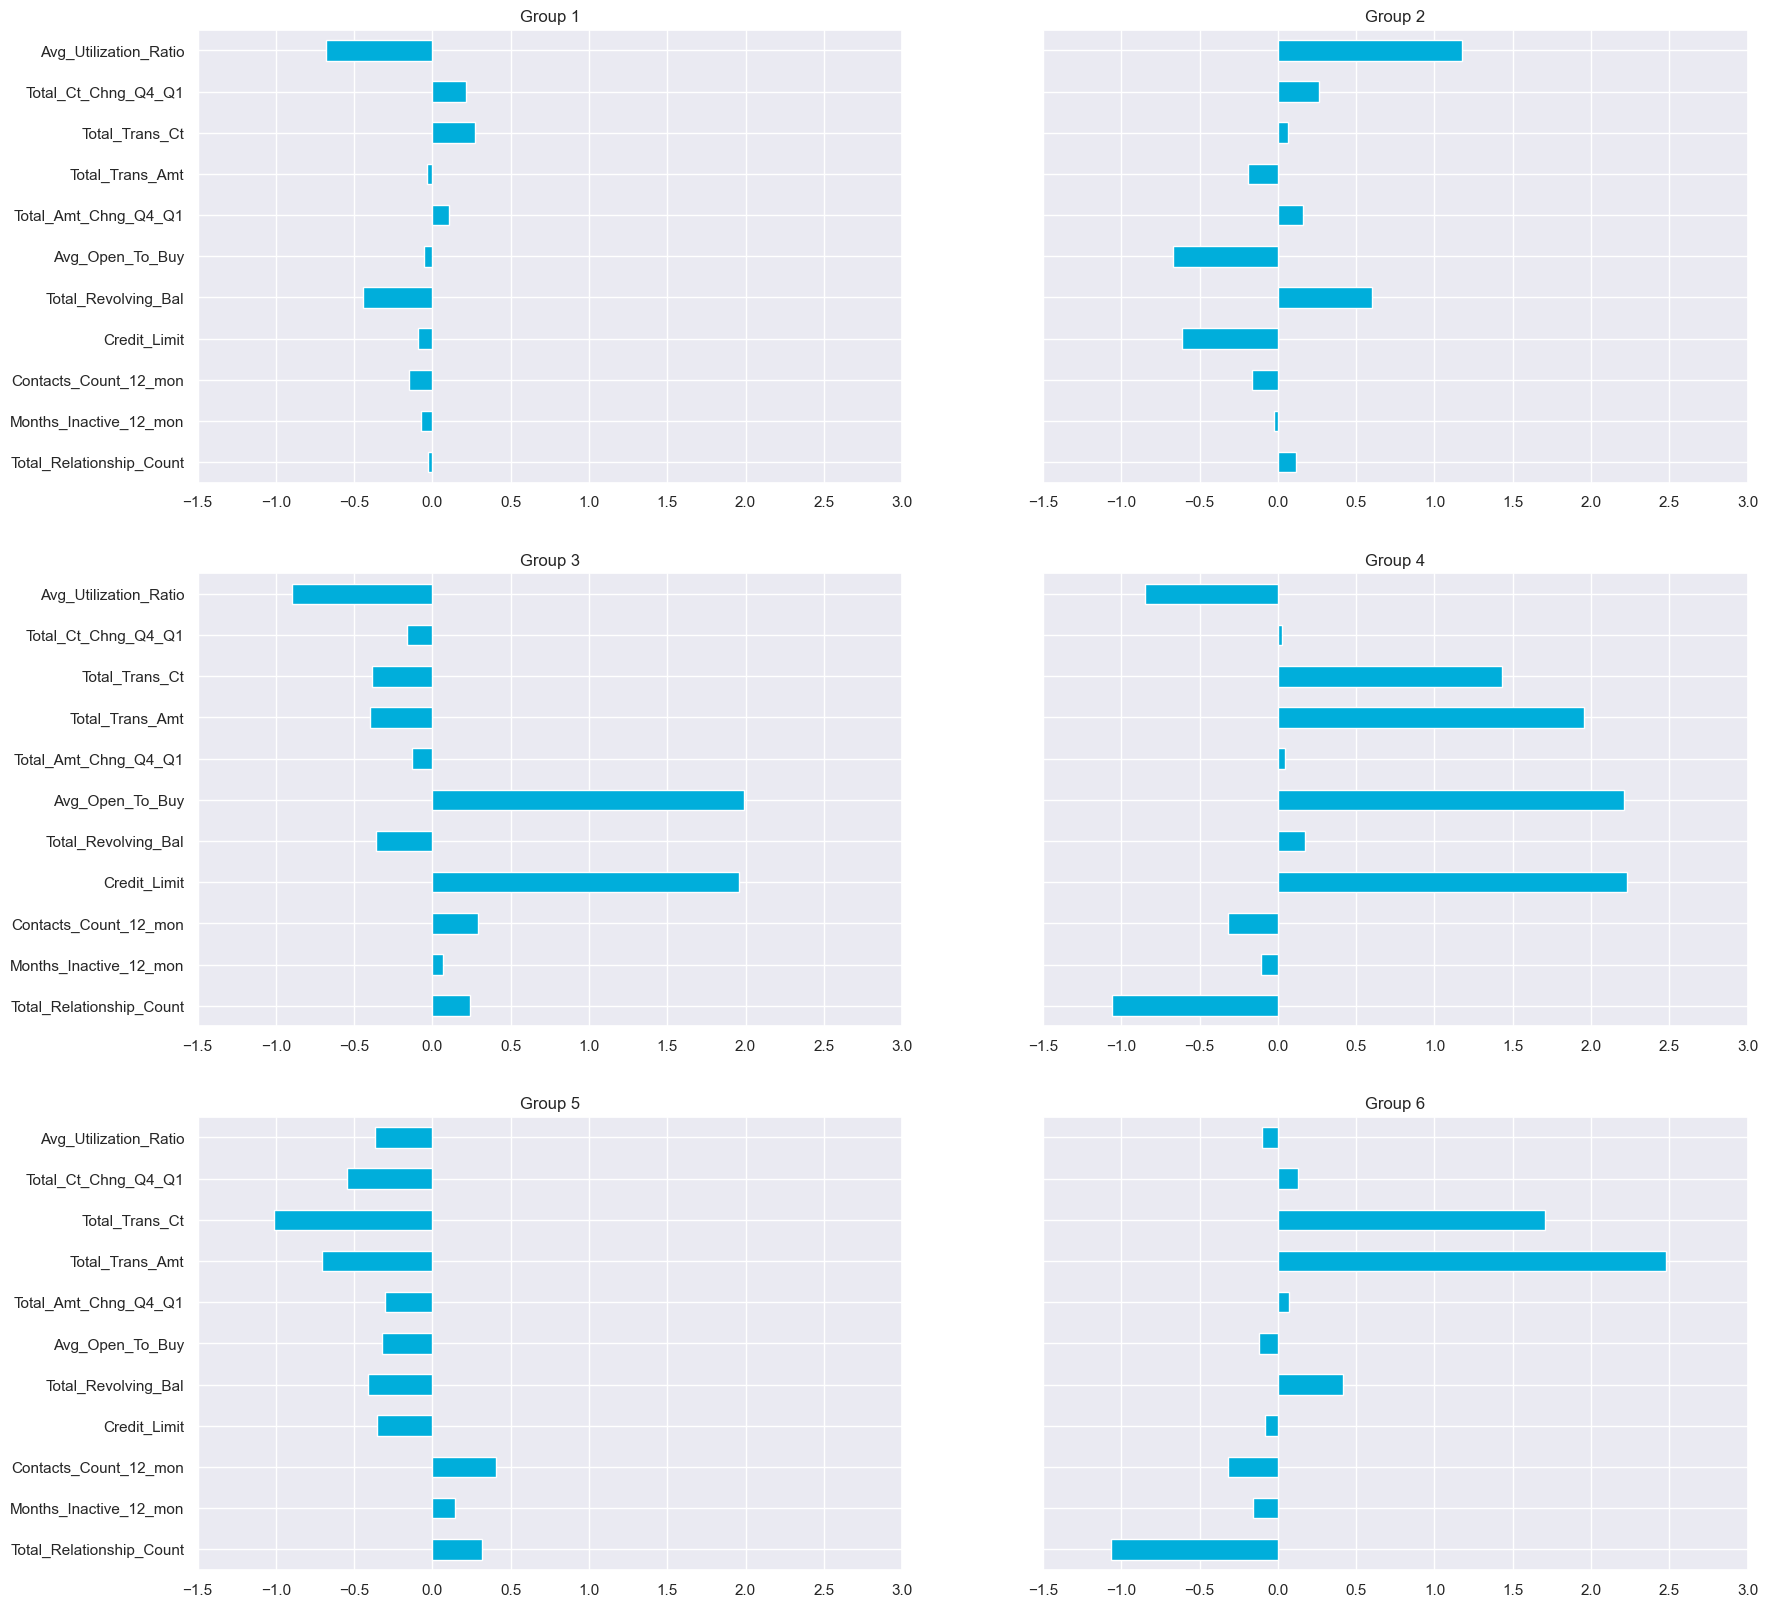

In [157]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))

scaled_cc[scaled_cc['cluster'] == 0][cols].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 1')
scaled_cc[scaled_cc['cluster'] == 1][cols].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 2')
scaled_cc[scaled_cc['cluster'] == 2][cols].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 3')
scaled_cc[scaled_cc['cluster'] == 3][cols].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 4')
scaled_cc[scaled_cc['cluster'] == 4][cols].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 5')
scaled_cc[scaled_cc['cluster'] == 5][cols].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 6')
plt.show()

In [113]:
#Looking at the charts above, we can see the groups have the following characteristics:

#Group 1: High transaction count and amount, higher balance, low relationship count, lower contact count
#Group 2: Low transaction count and amount, lower count and amount change from Q4 to Q1, high contact count, higher relationship count, higher months on book, higher months inactive, lower balance
#Group 3: High utilization ratio, higher count and amount change from Q4 to Q1, low avg open to buy, higher balance, low credit limit
#Group 4: Low transaction count and amount, low utilization ratio, lower count and amount change from Q4 to Q1, high contact count, higher relationship count, lower balance
#Group 5: Lower utilization ratio, higher transaction count, higher transaction count change from Q1 to Q4, low balance
#Group 6: High transaction count and amount, high avg open to buy, high credit limit, low relationship count, low utilization ratio
#Based on the results above, I decided to give the following names to each of the groups:

#Group 1: Higher balance heavy users
#Group 2: Long-time very light users
#Group 3: Low limit, high balance light users
#Group 4: High limit, low balance light users
#Group 5: Low limit, low balance light users
#Group 6: High limit, low balance heavy users

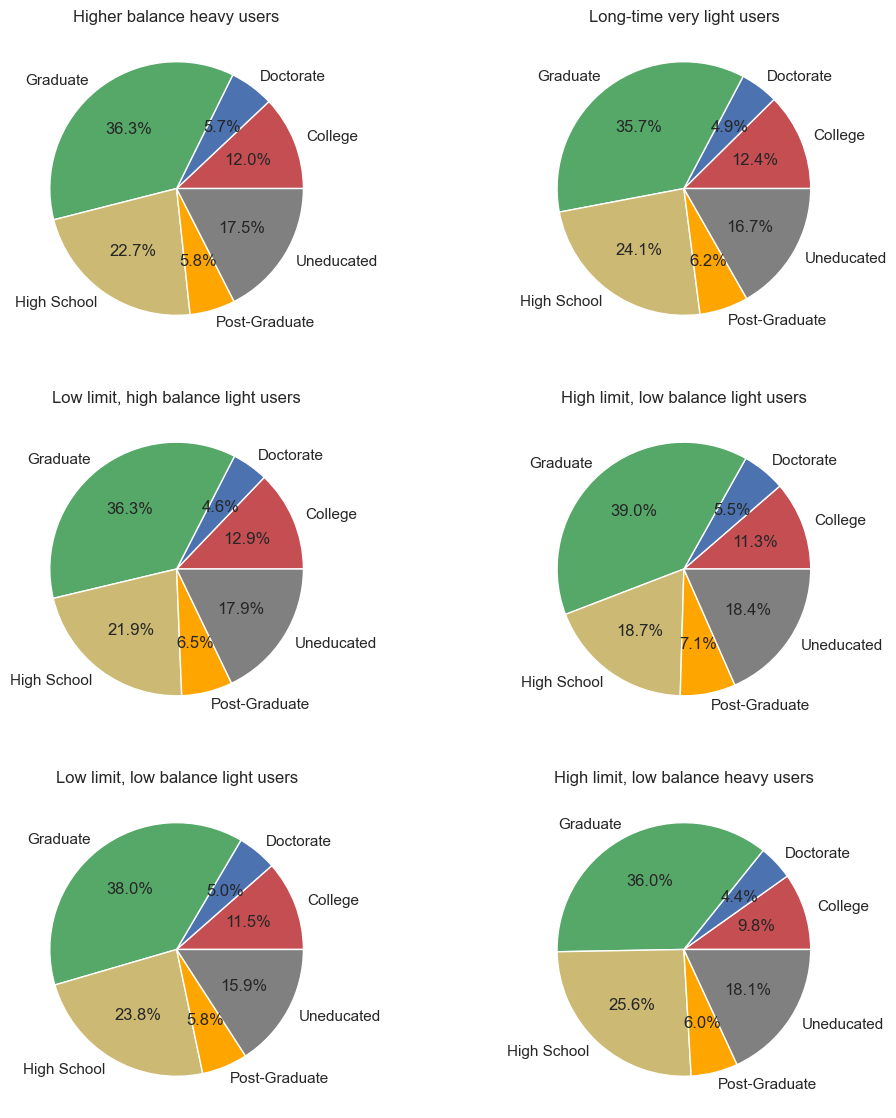

In [158]:
#Education Level
#There doesn't seem to be any significant differences in education between groups.

fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','y','orange', 'gray','pink'], autopct='%.1f%%')
plt.show()

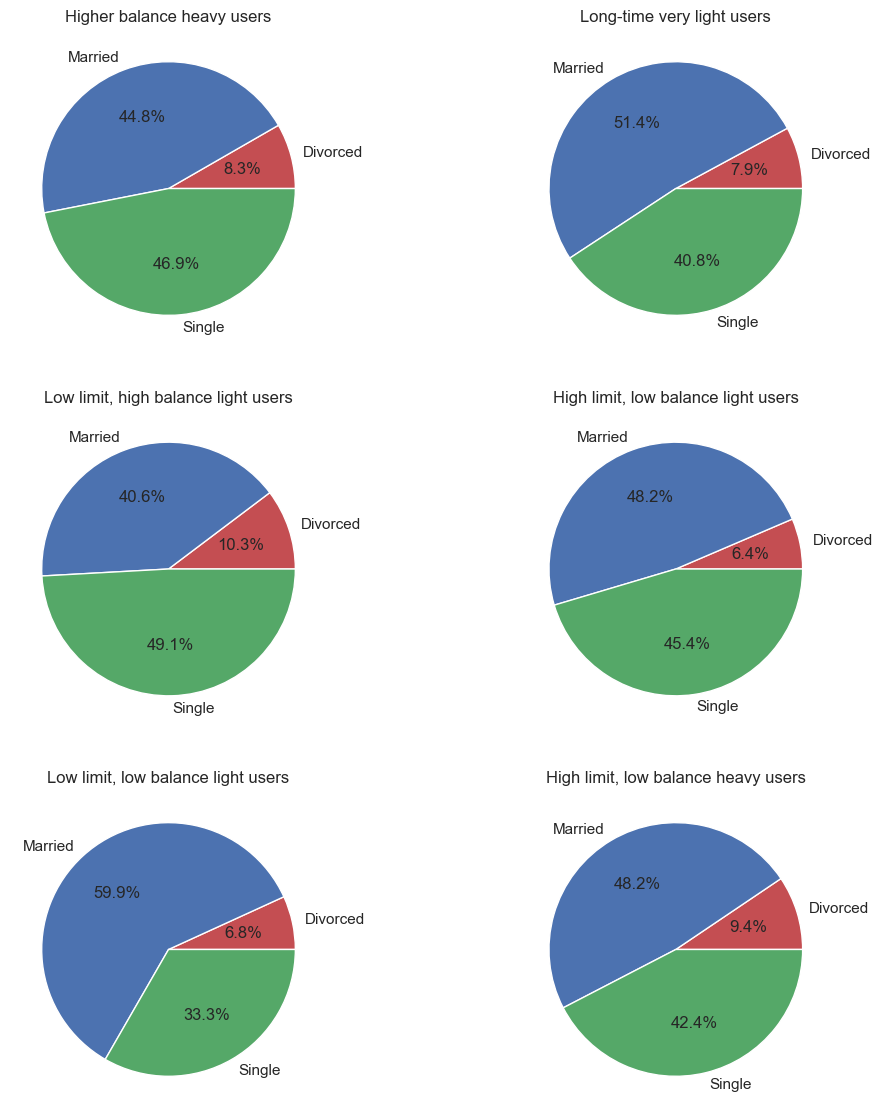

In [115]:
#Marital Status

fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','y'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','y'], autopct='%.1f%%')
plt.show()


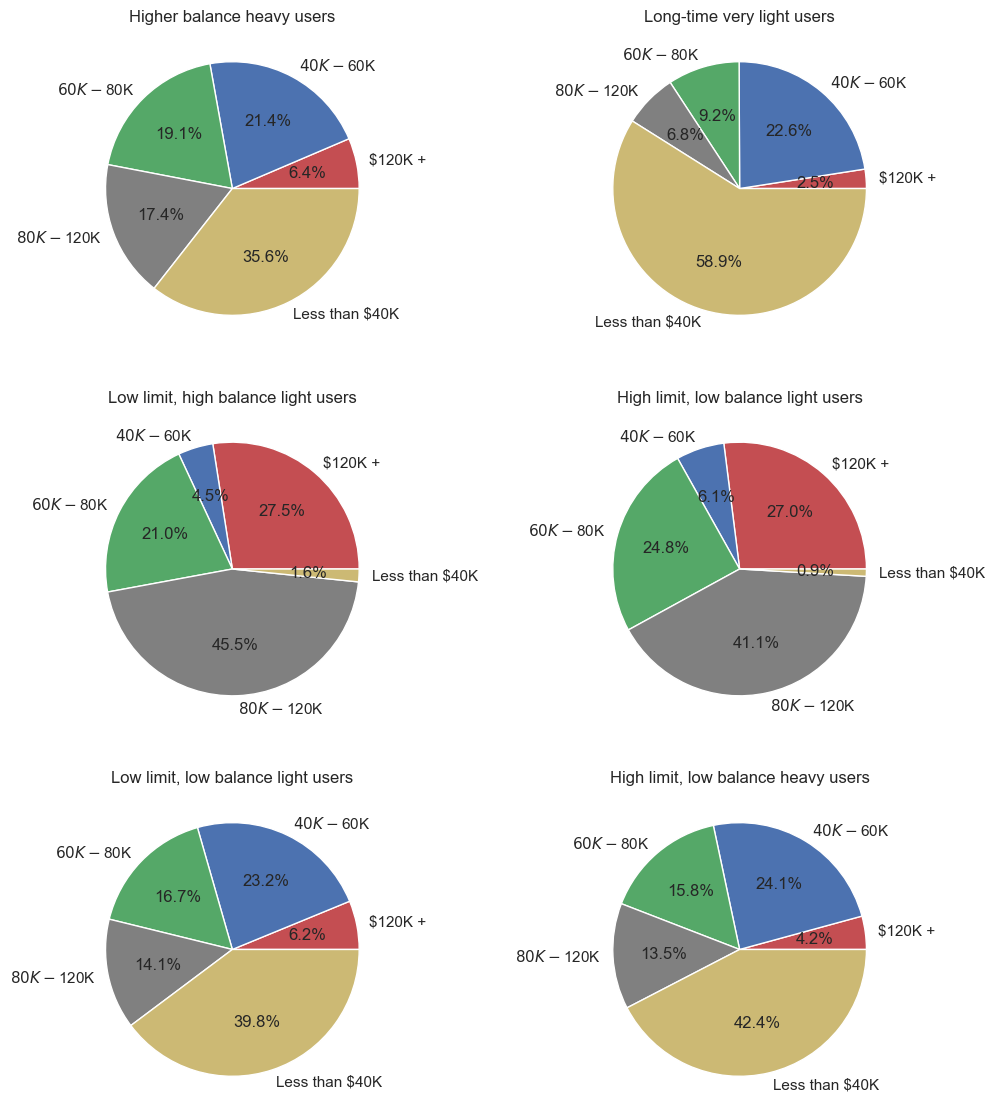

In [ ]:
#Income Level
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

cc[cc['cluster'] == 0]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Higher balance heavy users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 1]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Long-time very light users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 2]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Low limit, high balance light users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 3]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='High limit, low balance light users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 4]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Low limit, low balance light users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
cc[cc['cluster'] == 5]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='High limit, low balance heavy users', colors=['r','b','g','gray','y','pink'], autopct='%.1f%%')
plt.show()

In [117]:
#Hierarchical Clustering in place of K-Means and plot the Dendrogram (which helps in determining the optimal number of clusters), 
# you can follow these steps. The Dendrogram will allow you to visualize how the clusters are formed hierarchically, and you can use it to identify the "elbow" where the clusters start to merge.

#Here’s how you can modify your code to perform Agglomerative Hierarchical Clustering and create a Dendrogram instead of using the Elbow Method for K-Means

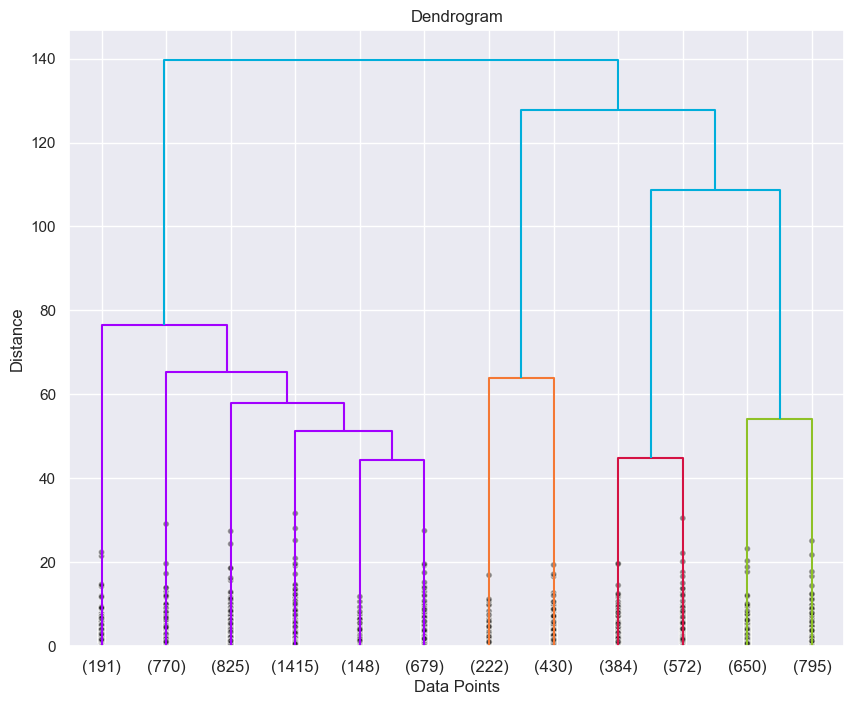

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Assuming 'cc' is your DataFrame and 'cols' are the features to cluster
# Preprocess the data (Standard scaling)
data = StandardScaler().fit_transform(cc[cols])

# Perform hierarchical/agglomerative clustering (Linkage method)
Z = linkage(data, method='ward')  # You can try different methods like 'single', 'complete', 'average', 'ward'

# Plot the Dendrogram
fig = plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=12, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [119]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at a specific number of clusters, say 4 clusters
num_clusters = 4
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

# Add the cluster labels to your data
cc['cluster'] = clusters

# You can now inspect the clusters
print(cc.groupby('cluster').size())


cluster
1    4028
2     652
3     956
4    1445
dtype: int64
